<a href="https://colab.research.google.com/github/HrishavSaha/Confusion-Matrix-Project/blob/main/Confusion_Matrix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [8]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('BankNote_Authentication.csv')
variance = df['variance']
actual = df['class']

In [6]:
variance_train, variance_test, actual_train, actual_test = train_test_split(variance,actual,test_size=0.25,random_state=0)

In [7]:
#Data Prep
X = np.reshape(variance_train.ravel(), (len(variance_train), 1))
Y = np.reshape(actual_train.ravel(), (len(actual_train), 1))
#Calculating best-fit Linear Regression values
lr = LogisticRegression().fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
X1 = np.reshape(variance_test.ravel(), (-1, 1))
Y1 = np.reshape(actual_test.ravel(), (len(actual_test), 1))

pred = lr.predict(X1)
accuracy = accuracy_score(actual_test, pred)
print("Model Accuracy:", accuracy * 100, "%")

Model Accuracy: 83.6734693877551 %


In [11]:
pred_val = []
for i in pred:
  if i == 0:
    pred_val.append('Authorized')
  else:
    pred_val.append('Forged')

act_val = []
for i in Y1:
  if i == 0:
    act_val.append('Authorized')
  else:
    act_val.append('Forged')

Model Accuracy: 83.6734693877551 %


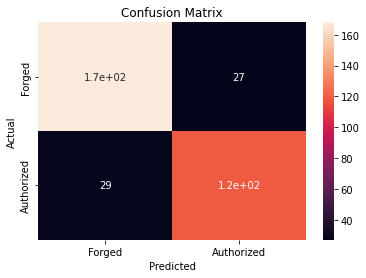

In [13]:
labels = ['Forged', 'Authorized']
cm = confusion_matrix(act_val, pred_val)
am = plt.subplot()
sb.heatmap(cm, annot=True)
am.set_xlabel('Predicted')
am.set_ylabel('Actual')
am.set_title('Confusion Matrix')
am.yaxis.set_ticklabels(labels)
am.xaxis.set_ticklabels(labels)

acc = accuracy_score(act_val, pred_val)
print('Model Accuracy:', acc*100, '%')